In [1]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import CategoricalDtype
import datetime
from time import strftime
from time import gmtime
from datetime import timedelta
from numpy import loadtxt
import dask.dataframe as dd
%matplotlib inline
import seaborn as sns
from pylab import *
import matplotlib
from sklearn.preprocessing import LabelBinarizer
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn import preprocessing

In [2]:
dataset_2014 = pd.read_csv('Datasets/data.csv')

In [3]:
dataset_2014['starttime'] = pd.to_datetime(dataset_2014['starttime'],infer_datetime_format=True)
dataset_2014['stoptime'] = pd.to_datetime(dataset_2014['stoptime'],infer_datetime_format=True)


In [4]:
cal = calendar()
holidays = cal.holidays(start=dataset_2014['starttime'].min(), end=dataset_2014['starttime'].max())



In [5]:
np.unique(dataset_2014.starttime.dt.weekday_name)

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [6]:
working_day=[]
for date in dataset_2014.starttime.dt.date:
    if date in holidays:
        working_day.append(0)
    elif date.weekday()==5 or date.weekday()==6:
        working_day.append(0)
    else:
        working_day.append(1)
    
dataset_2014['working_day'] = working_day 

In [7]:
import datetime
from datetime import timedelta

d = datetime.date(2020, 1, 4)

In [8]:
if d.weekday()==5 or d.weekday()==6:
    print("weekend",d.weekday())
else:
    print("weekday",d.weekday())

weekend 5


In [13]:
non_working = dataset_2014[(dataset_2014.working_day==0)]

In [14]:
non_working.shape

(230227, 24)

[[Text(0, 0, 'Weekend/Holiday'), Text(0, 0, 'Weekday')]]

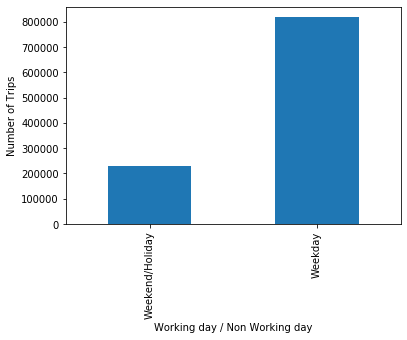

In [29]:
ax = dataset_2014.groupby(dataset_2014['working_day']).count()['trip_id'].plot(kind='bar')
ax.set(xlabel = "Working day / Non Working day", ylabel= "Number of Trips")
ax.set(xticks=[0,1])
ax.set(xticklabels={'Weekend/Holiday','Weekday'})